In [76]:
# %load ../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns

from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing, neighbors, svm
from sklearn.model_selection import train_test_split
from scipy.optimize import curve_fit
import statsmodels.api as sm
import statsmodels.formula.api as smf
import re
%matplotlib inline
plt.style.use('seaborn-white')

Here we are just dealing with Cu data

In [2]:
data = pd.ExcelFile('Data1/Cu.xlsx')
print(data.sheet_names)

['Sheet1', 'Sheet3', 'xS vs FeS domain']


In [3]:
df1 = data.parse('Sheet1')
df1.head(5)

,Reference,Run #,D(Cu),Dinv,LnFeDomains,LnDinv
0,NaN,IT10,0.43,2.325581,-0.063935,0.843970
1,3,IT11,0.32,3.125000,-0.171537,1.139434
2,Chabot 2008,IT14,0.33,3.030303,-0.297457,1.108663
3,"Fe-Ni-S, 1 atm",IT3,0.33,3.030303,-0.565593,1.108663
4,NaN,IT4,0.24,4.166667,-0.818951,1.427116


In [4]:
df2 = df1.drop(['Reference', 'Run #'], axis=1)
df2.dropna()
pd.options.display.max_rows = 999
df2.info()
df2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 4 columns):
D(Cu)          72 non-null float64
Dinv           72 non-null float64
LnFeDomains    72 non-null float64
LnDinv         72 non-null float64
dtypes: float64(4)
memory usage: 2.3 KB


,D(Cu),Dinv,LnFeDomains,LnDinv
0,0.43,2.325581,-0.063935,0.843970
1,0.32,3.125000,-0.171537,1.139434
2,0.33,3.030303,-0.297457,1.108663
3,0.33,3.030303,-0.565593,1.108663
4,0.24,4.166667,-0.818951,1.427116


In [5]:
df2['FeDomains'] = np.exp(df2['LnFeDomains'])
df2.head()

,D(Cu),Dinv,LnFeDomains,LnDinv,FeDomains
0,0.43,2.325581,-0.063935,0.843970,0.938066
1,0.32,3.125000,-0.171537,1.139434,0.842369
2,0.33,3.030303,-0.297457,1.108663,0.742704
3,0.33,3.030303,-0.565593,1.108663,0.568023
4,0.24,4.166667,-0.818951,1.427116,0.440894


**Assumption**: We have initially asssumed that all the non-metals have equal impact, and the concentration of Fe-domains is the only criteron on which the fractionation of elements depends.

Plotting Fe-Domains vs 1/D

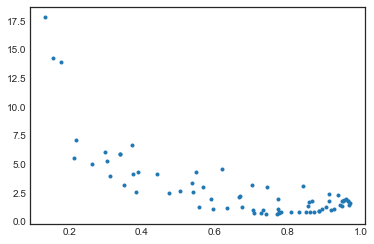

In [6]:
plt.plot(df2['FeDomains'],df2['Dinv'], marker='.', linestyle='none')
plt.show()

In [7]:
df2['Dinv'].min()

0.625

Dinv reaches its minimum value at aroud 7 and after that no point is below that, this curve looks more like a **hyperbola** than a linear , quadratic or logarithmic fit.

But if we **reject the Fe-S-C data** then even a linear model will give us a nice fit. Try this with qualitative variable introduction of different non-metals.

#### **(A)** Fitting a linear model

C:\Users\LENOVO\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


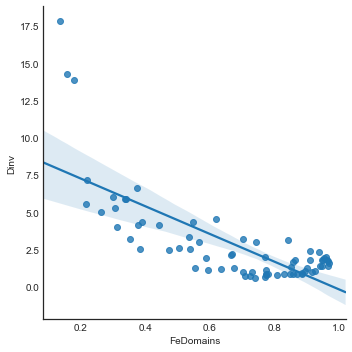

In [8]:
sns.lmplot(x='FeDomains', y='Dinv', data=df2)
plt.show()

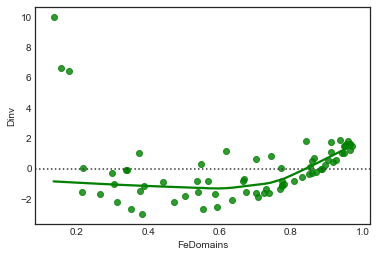

In [9]:
sns.residplot(x='FeDomains', y='Dinv', lowess=True, order = 1,data=df2, color='green')
plt.show()

**Residual plots are tools to identify non-linearity of data. Ideally, residual plots show no discernible pattern but presence of a pattern may show problem with some aspect of linear model.**

**An important assumption of the linear regression model is that the error
terms, e1, e2, . . . , en, are uncorrelated. What does this mean? For instance,
if the errors are uncorrelated, then the fact that ei is positive provides
little or no information about the sign of ei+1.**

1) Here we can see a little pattern in the values of residuals(1st problem)

2) The R^2 value of the fit is too low.

 //////////3) Even though there seems to be little **non-linearity in the response predictor relationship** but there is large **correlation in error terms**(2nd problem).

4) This residual plot seems to have constant variance.

Trying log, minus x2, square-root x to remove any pattern from the residual plot.

In [10]:
est = smf.ols('Dinv ~ FeDomains', df2).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Dinv   R-squared:                       0.546
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     84.07
Date:                Sat, 15 Dec 2018   Prob (F-statistic):           1.30e-13
Time:                        11:30:16   Log-Likelihood:                -154.85
No. Observations:                  72   AIC:                             313.7
Df Residuals:                      70   BIC:                             318.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.1166      0.723     12.616      0.000       7.675      10.558
FeDomains     -9.2683      1.011     -9.169      0.000     -11.284      -7.252
==============================================================================
Omnibus:                       52.668   Durbin-Watson:                   0.836
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              225.974
Skew:                           2.215   Prob(JB):                     8.52e-50
Kurtosis:                      10.463   Cond. No.                         5.98
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The linear regression model assumes that there is a straight-line relationship between the predictors and the response. If the true relationship is far from linear, then virtually all of the conclusions that we draw from the fit are suspect. In addition, the prediction accuracy of the model can be significantly reduced.
The nonlinearity in the regression plot and the poor R-squared value(~.54) tells us that linear model is not suitable for this data.

Degree 2 might do better!

### (B) Squared model

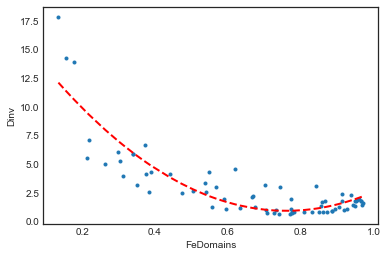

Function equation : 
        2
28.62 x - 43.5 x + 17.47


In [11]:
fit = np.polyfit(df2['FeDomains'],df2['Dinv'], 2)
fit_fn = np.poly1d(fit)

plt.plot(df2['FeDomains'],df2['Dinv'], '.', np.sort(df2['FeDomains']), fit_fn(np.sort(df2['FeDomains'])), '--r', linewidth=2)
plt.xlabel("FeDomains")
plt.ylabel("Dinv")
plt.show()
print('Function equation : \n',fit_fn)

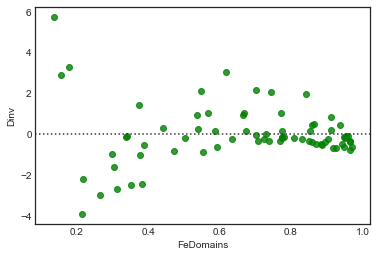

In [12]:
sns.residplot(x='FeDomains', y='Dinv', order = 2,data=df2, color='green')
plt.show()

The residual plot makes us clear the non-linearity of the data in the squared model above.

**IF WE COULD JUST IGNORE THE THREE POINTS** at the top then the rest of the data fits the linear model just fine. While, on changing the degree to 2 other than the 3 points on the top, rest of the model resists the degree 2 model.

However, this time we get a higher Rsquared value (~.78), than the linear model. But this is due to the fact that the earlier linear model was distorted too much by the outlier values of the Fe-S-C data.

1) Clear patterns in residuals, non-linearity of the response-predictor relationship

2)R^2 is decent

3)Significant correlation in error terms

4)Heteroscedasticity present

In [13]:
est = smf.ols('Dinv ~ FeDomains + np.square(FeDomains)', df2).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Dinv   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     125.9
Date:                Sat, 15 Dec 2018   Prob (F-statistic):           9.48e-24
Time:                        11:30:17   Log-Likelihood:                -127.94
No. Observations:                  72   AIC:                             261.9
Df Residuals:                      69   BIC:                             268.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               17.4690      1.077     16.220      0.000      15.320      19.618
FeDomains              -43.5000      3.970    -10.957      0.000     -51.420     -35.580
np.square(FeDomains)    28.6214      3.267      8.760      0.000      22.103      35.140
==============================================================================
Omnibus:                       18.583   Durbin-Watson:                   1.132
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.610
Skew:                           0.792   Prob(JB):                     9.22e-10
Kurtosis:                       6.371   Cond. No.                         40.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

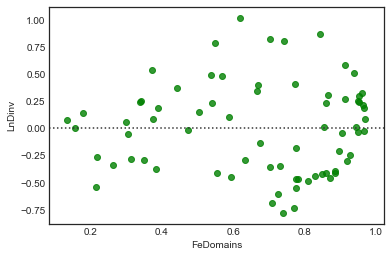

In [14]:
sns.residplot(x='FeDomains', y='LnDinv', order = 2,data=df2, color='green')
plt.show()

Heteroscedasticity definately reduced

In [15]:
est = smf.ols('LnDinv ~ FeDomains + np.square(FeDomains)', df2).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 LnDinv   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     86.91
Date:                Sat, 15 Dec 2018   Prob (F-statistic):           1.40e-19
Time:                        11:30:17   Log-Likelihood:                -38.712
No. Observations:                  72   AIC:                             83.42
Df Residuals:                      69   BIC:                             90.25
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                3.8849      0.312     12.455      0.000       3.263       4.507
FeDomains               -8.7447      1.150     -7.606      0.000     -11.038      -6.451
np.square(FeDomains)     5.2856      0.946      5.586      0.000       3.398       7.173
==============================================================================
Omnibus:                        2.319   Durbin-Watson:                   0.627
Prob(Omnibus):                  0.314   Jarque-Bera (JB):                2.003
Skew:                           0.289   Prob(JB):                        0.367
Kurtosis:                       2.422   Cond. No.                         40.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

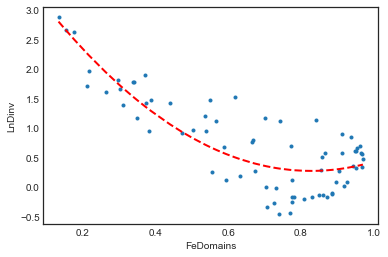

Function equation : 
        2
5.286 x - 8.745 x + 3.885


In [16]:
fit = np.polyfit(df2['FeDomains'],df2['LnDinv'], 2)
fit_fn = np.poly1d(fit)

plt.plot(df2['FeDomains'],df2['LnDinv'], '.', np.sort(df2['FeDomains']), fit_fn(np.sort(df2['FeDomains'])), '--r', linewidth=2)
plt.xlabel("FeDomains")
plt.ylabel("LnDinv")
plt.show()
print('Function equation : \n',fit_fn)

1) Non-linearity in predictor-response relationship has definately reduced

2) R2 reduced a bit, but still acceptable.

3)No clear correlation present in error terms

4)Looks homoscedastic

This fit seems good, but a problem with squared model is that its value decreases, reaches a minimum and then again increases. Here(in case of Cu) it reaches its minimum close to 0.85, and after that it increases, but in some other element we might have that minimum close to 0.5, which may cause some problem.

The doubt is that our equation suggest that the LnDinv will have a minimum at some point and will increase both sides from that point. But chemically on increasing the concentration of Fe,(for siderophile elements) the value Dinv should only decrease.

**Now even if our domain lies between 0 and 1 and our minimum is close to 1, does this fit actually represent the predictor-response relationship correctly?**

No, I don't think so!

### (C) Trying Square-root of x

Now rather than fitting a square-root line to the data, we are fitting a straight line to the squared data.

Now, this is a bit unintuitive, the reason is that np.polyfit works only with integer values

In [17]:
df2.head()

,D(Cu),Dinv,LnFeDomains,LnDinv,FeDomains
0,0.43,2.325581,-0.063935,0.843970,0.938066
1,0.32,3.125000,-0.171537,1.139434,0.842369
2,0.33,3.030303,-0.297457,1.108663,0.742704
3,0.33,3.030303,-0.565593,1.108663,0.568023
4,0.24,4.166667,-0.818951,1.427116,0.440894


In [18]:
df2['sqrtFeDomains'] = np.sqrt(df2['FeDomains'])
df2['OneMinusFeD'] = np.subtract(1,df2['FeDomains'])
df2.head()

,D(Cu),Dinv,LnFeDomains,LnDinv,FeDomains,sqrtFeDomains,OneMinusFeD
0,0.43,2.325581,-0.063935,0.843970,0.938066,0.968538,0.061934
1,0.32,3.125000,-0.171537,1.139434,0.842369,0.917807,0.157631
2,0.33,3.030303,-0.297457,1.108663,0.742704,0.861803,0.257296
3,0.33,3.030303,-0.565593,1.108663,0.568023,0.753673,0.431977
4,0.24,4.166667,-0.818951,1.427116,0.440894,0.663998,0.559106


In [19]:
## ya! this doesn't work, just gives a stright line
## So, we need to plot a regressio w/o a library or just a st-line on the square-rooted data
## Taking the square root seems much more convinient than writing the code w/o any library !! 

# fit = np.polyfit(df2['FeDomains'],df2['Dinv'], 0.5)
# fit_fn = np.poly1d(fit)

# plt.plot(df2['FeDomains'],df2['Dinv'], '.', np.sort(df2['FeDomains']), fit_fn(np.sort(df2['FeDomains'])), '--r', linewidth=2)
# plt.xlabel("FeDomains")
# plt.ylabel("Dinv")
# plt.show()

In [20]:
est = smf.ols('Dinv ~ FeDomains + sqrtFeDomains', df2).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Dinv   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     184.2
Date:                Sat, 15 Dec 2018   Prob (F-statistic):           2.14e-28
Time:                        11:30:18   Log-Likelihood:                -116.77
No. Observations:                  72   AIC:                             239.5
Df Residuals:                      69   BIC:                             246.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        40.4117      2.781     14.532      0.000      34.864      45.959
FeDomains        52.3154      5.440      9.617      0.000      41.463      63.168
sqrtFeDomains   -90.5812      7.953    -11.390      0.000    -106.447     -74.716
==============================================================================
Omnibus:                        7.058   Durbin-Watson:                   1.167
Prob(Omnibus):                  0.029   Jarque-Bera (JB):               12.746
Skew:                           0.083   Prob(JB):                      0.00171
Kurtosis:                       5.055   Cond. No.                         99.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

regr_coeff : [ 52.31543059 -90.58121186]
regr_intercept : 40.41165509917685
regr_score : 0.8422477831659844


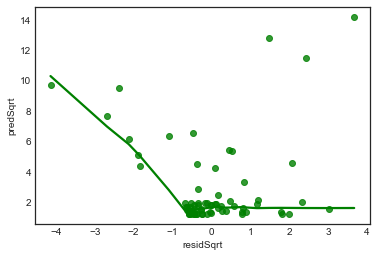

In [21]:
regr = skl_lm.LinearRegression()

# Linear fit
Xsqrt = df2[['FeDomains','sqrtFeDomains']].values
ysqrt = df2['Dinv']
regr.fit(Xsqrt, ysqrt)
print('regr_coeff :',regr.coef_)
print('regr_intercept :',regr.intercept_)
print('regr_score :',regr.score(Xsqrt,ysqrt))

df2['predSqrt'] = regr.predict(Xsqrt)
df2['residSqrt'] = df2.Dinv - df2.predSqrt

sns.regplot(df2['residSqrt'],df2['predSqrt'], lowess=True, color='green')

Now, the sqrt model is definately **rejected** with this much non-linearity in the relationship.

### (D) Trying log of x

C:\Users\LENOVO\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


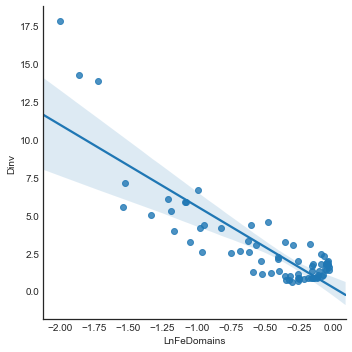

In [22]:
sns.lmplot(x='LnFeDomains', y='Dinv', data=df2)
plt.show()

In [23]:
est = smf.ols('Dinv ~ LnFeDomains', df2).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Dinv   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.718
Method:                 Least Squares   F-statistic:                     181.3
Date:                Sat, 15 Dec 2018   Prob (F-statistic):           4.13e-21
Time:                        11:30:19   Log-Likelihood:                -137.24
No. Observations:                  72   AIC:                             278.5
Df Residuals:                      70   BIC:                             283.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.2343      0.277      0.845      0.401      -0.319       0.787
LnFeDomains    -5.3741      0.399    -13.466      0.000      -6.170      -4.578
==============================================================================
Omnibus:                       26.178   Durbin-Watson:                   0.913
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               54.571
Skew:                           1.222   Prob(JB):                     1.41e-12
Kurtosis:                       6.495   Cond. No.                         2.67
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Significant p-value of the intercept.**

**Need to deal with high p-value ~~~**

This might be due to the high levarage points.

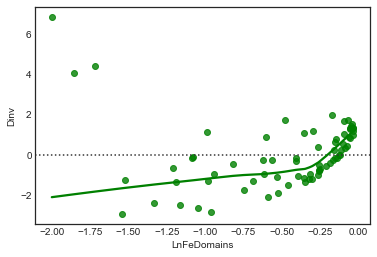

In [24]:
sns.residplot(x='LnFeDomains', y='Dinv', lowess=True, order = 1,data=df2, color='green')
plt.show()

Here the regression line of the residual plot looks better than the squared model(B). The residual curve for the linear model(A) might look better than model(D) at first glance but model(A) has a different axis than this(D) and actually that one(A) is very similar to this one. But this might also be due to outliers. W/o the outliers the regression plot of residuals of model(D) will be worse.

This fit suffers from heteroscedasticity

1) PR relationship seems to be linear

2) R2 is decent

///////////////3)Error terms are correlated.

4)Sort-of heteroscedastic

**Taking log of response to remove heteroscedasticity**

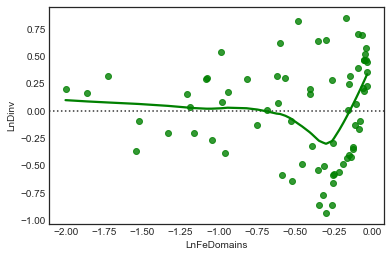

In [25]:
sns.residplot(x='LnFeDomains', y='LnDinv', lowess=True, order = 1,data=df2, color='green')
plt.show()

Can't comment on heteroscedasticty, on this curve, this might just be because of too few data points.

C:\Users\LENOVO\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


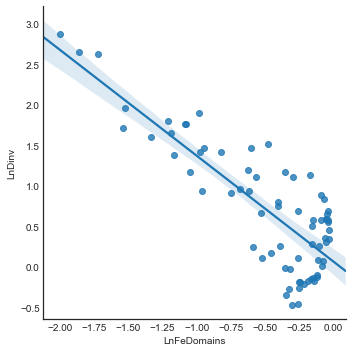

In [26]:
sns.lmplot(x='LnFeDomains', y='LnDinv', data=df2)
plt.show()

Now this definately looks a better fit than its predecessor

In [27]:
est = smf.ols('LnDinv ~ LnFeDomains', df2).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 LnDinv   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     142.4
Date:                Sat, 15 Dec 2018   Prob (F-statistic):           1.54e-18
Time:                        11:30:19   Log-Likelihood:                -44.046
No. Observations:                  72   AIC:                             92.09
Df Residuals:                      70   BIC:                             96.64
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0696      0.076      0.916      0.363      -0.082       0.221
LnFeDomains    -1.3054      0.109    -11.934      0.000      -1.524      -1.087
==============================================================================
Omnibus:                        6.467   Durbin-Watson:                   0.526
Prob(Omnibus):                  0.039   Jarque-Bera (JB):                2.802
Skew:                          -0.163   Prob(JB):                        0.246
Kurtosis:                       2.090   Cond. No.                         2.67
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Surprisingly, the value of **r2 has decreased.** Also there is a **significant p-value of the intercept.**

**NEED TO DEAL WITH THE INTERCEPT TERM**

### (E) Checking for hyperbola

In [28]:
df2['FeDomainsInv'] = np.reciprocal(df2['FeDomains'])
df2.head()

,D(Cu),Dinv,LnFeDomains,LnDinv,FeDomains,sqrtFeDomains,OneMinusFeD,predSqrt,residSqrt,FeDomainsInv
0,0.43,2.325581,-0.063935,0.843970,0.938066,0.968538,0.061934,1.755631,0.569950,1.066023
1,0.32,3.125000,-0.171537,1.139434,0.842369,0.917807,0.157631,1.344516,1.780484,1.187128
2,0.33,3.030303,-0.297457,1.108663,0.742704,0.861803,0.257296,1.203396,1.826907,1.346431
3,0.33,3.030303,-0.565593,1.108663,0.568023,0.753673,0.431977,1.859406,1.170897,1.760491
4,0.24,4.166667,-0.818951,1.427116,0.440894,0.663998,0.559106,3.331429,0.835238,2.268120


popt:  [ 2.25439987 -1.37874726]
pcov:  [[ 0.01133316 -0.02148365]
 [-0.02148365  0.05907179]]


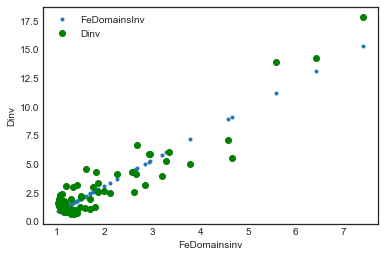

In [29]:
def hyperbola(t,a,b):
    return a*t + b

popt, pcov = curve_fit(hyperbola, df2['FeDomainsInv'], df2['Dinv'])

print('popt: ',popt)
print('pcov: ',pcov)


plt.plot(df2['FeDomainsInv'], hyperbola(df2['FeDomainsInv'], *popt), '.', )

plt.plot(df2['FeDomainsInv'],df2['Dinv'], marker='o', linestyle='none',  color='green')

plt.xlabel('FeDomainsinv')
plt.ylabel('Dinv')
plt.legend()
plt.show()

In [30]:
est = smf.ols('Dinv ~ FeDomainsInv', df2).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Dinv   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     448.4
Date:                Sat, 15 Dec 2018   Prob (F-statistic):           3.73e-32
Time:                        11:30:20   Log-Likelihood:                -111.17
No. Observations:                  72   AIC:                             226.3
Df Residuals:                      70   BIC:                             230.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -1.3787      0.243     -5.673      0.000      -1.863      -0.894
FeDomainsInv     2.2544      0.106     21.177      0.000       2.042       2.467
==============================================================================
Omnibus:                        1.829   Durbin-Watson:                   1.059
Prob(Omnibus):                  0.401   Jarque-Bera (JB):                1.172
Skew:                          -0.126   Prob(JB):                        0.557
Kurtosis:                       3.572   Cond. No.                         4.67
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

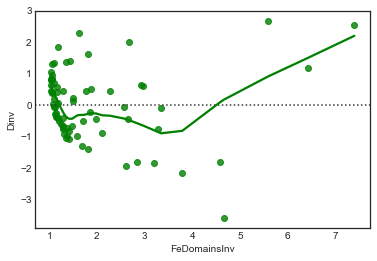

In [31]:
sns.residplot(x='FeDomainsInv', y='Dinv', lowess=True, order = 1,data=df2, color='green')
plt.show()

Value of R^2 has also increased significantly.

**heteroscedastic**

Introducing LnDinv to deal with heteroscedasticity

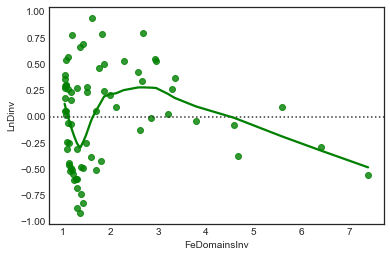

In [32]:
sns.residplot(x='FeDomainsInv', y='LnDinv', lowess=True, order = 1,data=df2, color='green')
plt.show()

Non-linearity in the PR relationship visible

popt:  [ 0.49400187 -0.22060662]
pcov:  [[ 0.0018433  -0.00349425]
 [-0.00349425  0.00960785]]


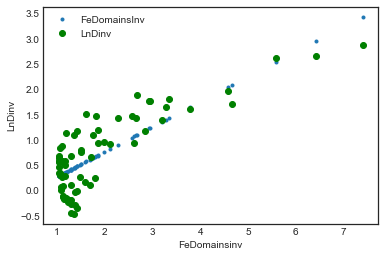

In [33]:
popt, pcov = curve_fit(hyperbola, df2['FeDomainsInv'], df2['LnDinv'])

print('popt: ',popt)
print('pcov: ',pcov)


plt.plot(df2['FeDomainsInv'], hyperbola(df2['FeDomainsInv'], *popt), '.', )

plt.plot(df2['FeDomainsInv'],df2['LnDinv'], marker='o', linestyle='none',  color='green')

plt.xlabel('FeDomainsinv')
plt.ylabel('LnDinv')
plt.legend()
plt.show()

In [34]:
est = smf.ols('LnDinv ~ FeDomainsInv', df2).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 LnDinv   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     132.4
Date:                Sat, 15 Dec 2018   Prob (F-statistic):           8.48e-18
Time:                        11:30:21   Log-Likelihood:                -45.788
No. Observations:                  72   AIC:                             95.58
Df Residuals:                      70   BIC:                             100.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.2206      0.098     -2.251      0.028      -0.416      -0.025
FeDomainsInv     0.4940      0.043     11.506      0.000       0.408       0.580
==============================================================================
Omnibus:                        7.380   Durbin-Watson:                   0.416
Prob(Omnibus):                  0.025   Jarque-Bera (JB):                2.787
Skew:                          -0.074   Prob(JB):                        0.248
Kurtosis:                       2.048   Cond. No.                         4.67
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The value of r2 decreased a lot.

#########################################################################

## Replicating the research paper

Plotting Ln(Fe-domains) vs Ln(1/D)

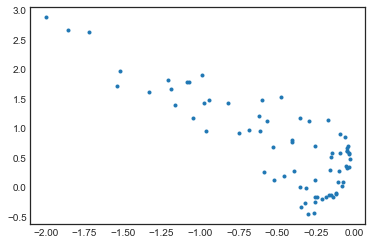

In [45]:
plt.plot(df2['LnFeDomains'],df2['LnDinv'], marker='.', linestyle='none')
plt.show()

C:\Users\LENOVO\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


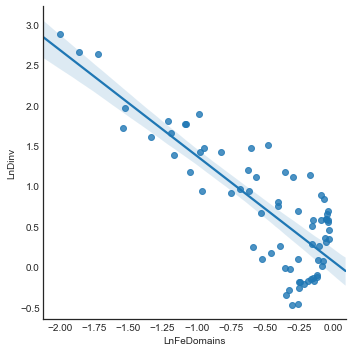

In [46]:
sns.lmplot(x='LnFeDomains', y='LnDinv', data=df2)
plt.show()

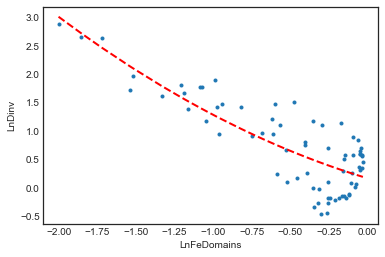

In [47]:
fit = np.polyfit(df2['LnFeDomains'],df2['LnDinv'], 2)
fit_fn = np.poly1d(fit)

plt.plot(df2['LnFeDomains'],df2['LnDinv'], '.', np.sort(df2['LnFeDomains']), fit_fn(np.sort(df2['LnFeDomains'])), '--r', linewidth=2)
plt.xlabel("LnFeDomains")
plt.ylabel("LnDinv")
plt.show()

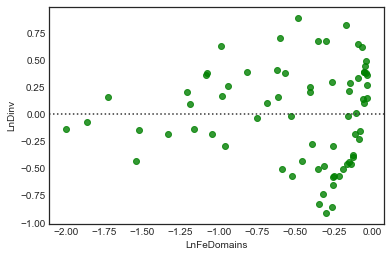

In [48]:
sns.residplot(x='LnFeDomains', y='LnDinv', order = 2,data=df2, color='green')
plt.show()

Residual plots are tools to identify non-linearity of data. Ideally, residual plots show no discernible pattern but presence of a pattern may show problem with some aspect of linear model. 
Here we can clearly see that as the concentration of Fe domains increases the spread 
This data is suffering from **heteroscedasticity**

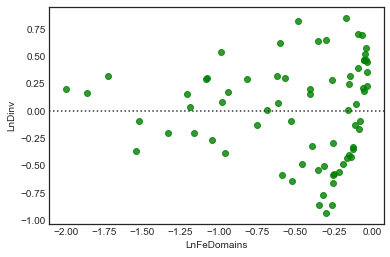

In [49]:
sns.residplot(x='LnFeDomains', y='LnDinv', order = 1,data=df2, color='green')
plt.show()

In [51]:
est = smf.ols('LnDinv ~ LnFeDomains', df2).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 LnDinv   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     142.4
Date:                Sat, 15 Dec 2018   Prob (F-statistic):           1.54e-18
Time:                        11:30:27   Log-Likelihood:                -44.046
No. Observations:                  72   AIC:                             92.09
Df Residuals:                      70   BIC:                             96.64
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0696      0.076      0.916      0.363      -0.082       0.221
LnFeDomains    -1.3054      0.109    -11.934      0.000      -1.524      -1.087
==============================================================================
Omnibus:                        6.467   Durbin-Watson:                   0.526
Prob(Omnibus):                  0.039   Jarque-Bera (JB):                2.802
Skew:                          -0.163   Prob(JB):                        0.246
Kurtosis:                       2.090   Cond. No.                         2.67
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [114]:
est = smf.ols('LnDinv ~ np.square(LnFeDomains)', df2).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 LnDinv   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     132.9
Date:                Sat, 15 Dec 2018   Prob (F-statistic):           7.78e-18
Time:                        15:29:10   Log-Likelihood:                -45.699
No. Observations:                  72   AIC:                             95.40
Df Residuals:                      70   BIC:                             99.95
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0.3502      0.063      5.550      0.000       0.224       0.476
np.square(LnFeDomains)     0.7574      0.066     11.528      0.000       0.626       0.888
==============================================================================
Omnibus:                        6.112   Durbin-Watson:                   0.426
Prob(Omnibus):                  0.047   Jarque-Bera (JB):                2.497
Skew:                           0.033   Prob(JB):                        0.287
Kurtosis:                       2.090   Cond. No.                         1.74
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**There is almost no change is residual plot and also almost no change in the Rsquared statistic, but surprizingly the p-value became statistically significant, in case of copper.**

?????????????????look for the reason for the decrease of p-value

In [115]:
# Regression coefficients (Ordinary Least Squares)
regr = skl_lm.LinearRegression()

X = scale(df2['LnFeDomains'], with_mean=True, with_std=False).reshape(-1,1)
y = df2['LnDinv']

regr.fit(X,y)
print(X.shape)
print(y[:5])
print('Beta0:',regr.intercept_)
print('Beta1:',regr.coef_)

(72, 1)
0    0.843970
1    1.139434
2    1.108663
3    1.108663
4    1.427116
Name: LnDinv, dtype: float64
Beta0: 0.7158455292999182
Beta1: [-1.30541842]


In [52]:
# RSS with regression coefficients
((df2['LnDinv'] - (est.params[0] + est.params[1]*df2['LnFeDomains']))**2).sum()/1000

0.014328918247771027

In [53]:
regr = skl_lm.LinearRegression()

X = df2['LnFeDomains'].values.reshape(-1,1)
y = df2['LnDinv']

regr.fit(X,y)
print(regr.intercept_)
print(regr.coef_)

0.06958169008173909
[-1.30541842]


In [54]:
LnDinv_pred = regr.predict(X)
r2_score(y, LnDinv_pred)

0.6704727506690911